In [1]:
import importlib
import shiftNMF_frozen
importlib.reload(shiftNMF_frozen)
from shiftNMF_frozen import ShiftNMF
from nnls_l1 import nnls
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from helpers.generators import *
from helpers.data import X_WINE, PPM_WINE
import Hardmodel_single_peaks
importlib.reload(Hardmodel_single_peaks)
from Hardmodel_single_peaks import Single_Model
from Hardmodel import Hard_Model
import scipy
from scipy.signal import find_peaks
import itertools

import helpers.fit_functions 
importlib.reload(helpers.fit_functions)
from helpers.fit_functions import *

# shiftNMF

[5.99978451 5.99915313 5.99852176 ... 0.50114961 0.50051823 0.49988686]
3.758407321767532
3.474289087241136


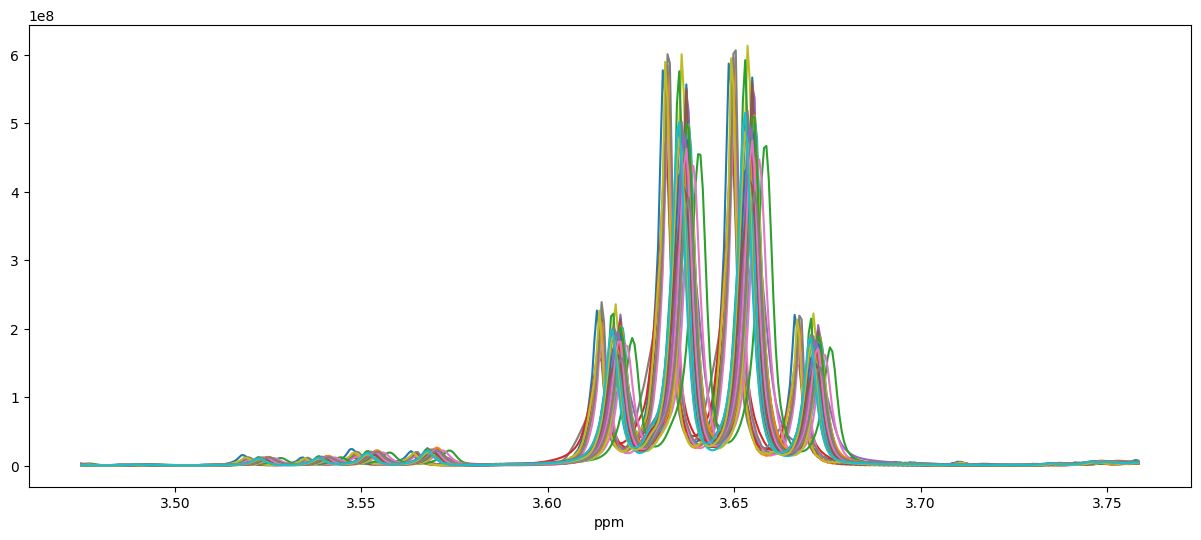

In [16]:
# 3.5-3.7
si = 3550
ei = 4000
#3.5-3.6
# si = 3800
# ei = 4000
#

print(PPM_WINE)
X = X_WINE[:,si:ei]
print(PPM_WINE[si])
print(PPM_WINE[ei])
ppm = PPM_WINE[si:ei]
plt.figure(figsize=(15,6))
plt.plot(ppm,X.T)
plt.xlabel("ppm")
plt.show()

epoch: 1000, Loss: 0.01743483401125159, Tau: 1112.5268536084877


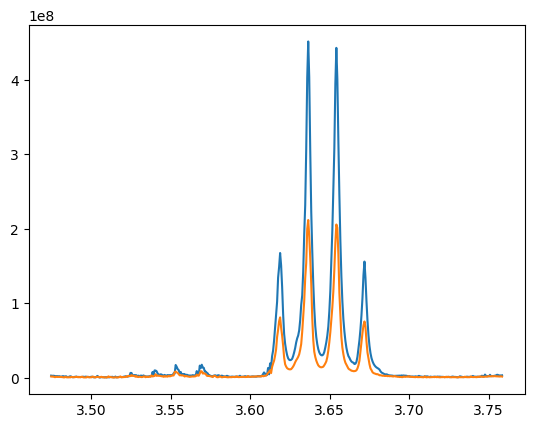

In [38]:

nmf = ShiftNMF(X, 2, lr=0.1, alpha=1e-6, min_imp=0.001)
W_est, H_est, tau_est = nmf.fit(verbose=1, max_iter=1000, tau_iter=0, Lambda=0.000)
plt.plot(ppm,H_est.T)
plt.show()


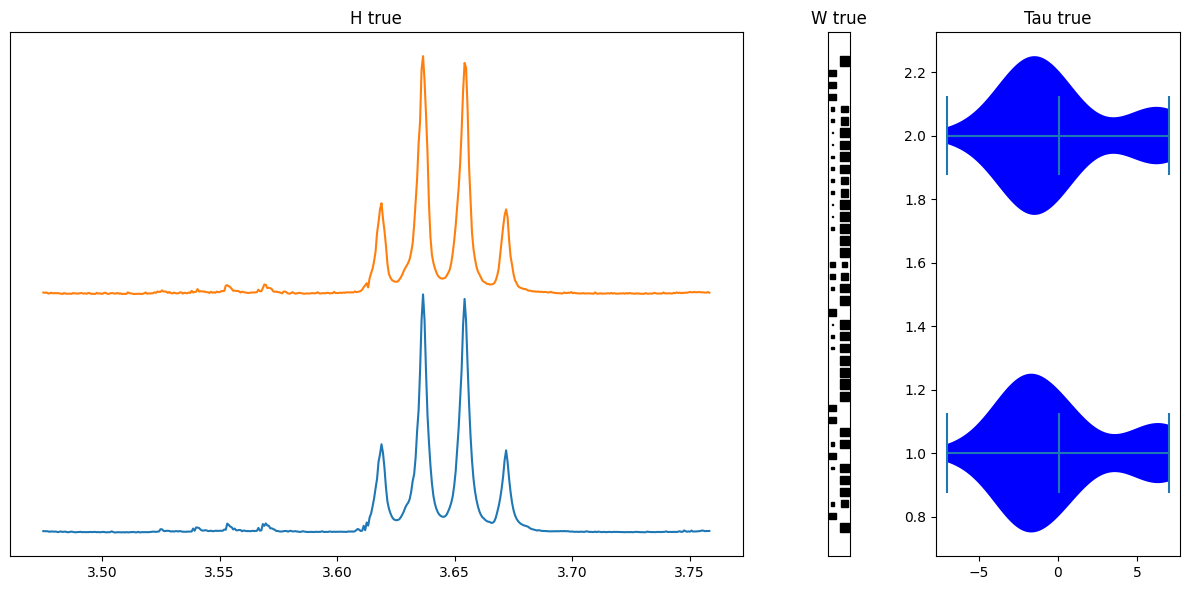

In [39]:
from helpers.plot import *
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 1, 1])

fig = plt.figure(figsize=(12, 6))
N, M = X[:,0:3000].shape
H_scaled = np.zeros_like(H_est)
for i, vec in enumerate(H_est):
    H_scaled[i] = vec/max(vec)

# Plot H and H_est
ax1 = plt.subplot(gs[0])
plotSpaced(ax1, ppm, H_scaled.T)
ax1.set_title('H true')

ax2 = plt.subplot(gs[1])
ax2.set_title('W true')
hinton(W_est.T, ax=ax2)

ax3 = plt.subplot(gs[2])
violin_parts = ax3.violinplot(tau_est, showmeans=True, showmedians=False, vert=False)
ax3.set_title('Tau true')
change_violin_colors(violin_parts, color_list=['blue']*N)
# change_violin_colors(violin_parts, [l.get_color() for l in ax3.get_children()[:3]])

# Set tight layout
plt.tight_layout()
plt.show()

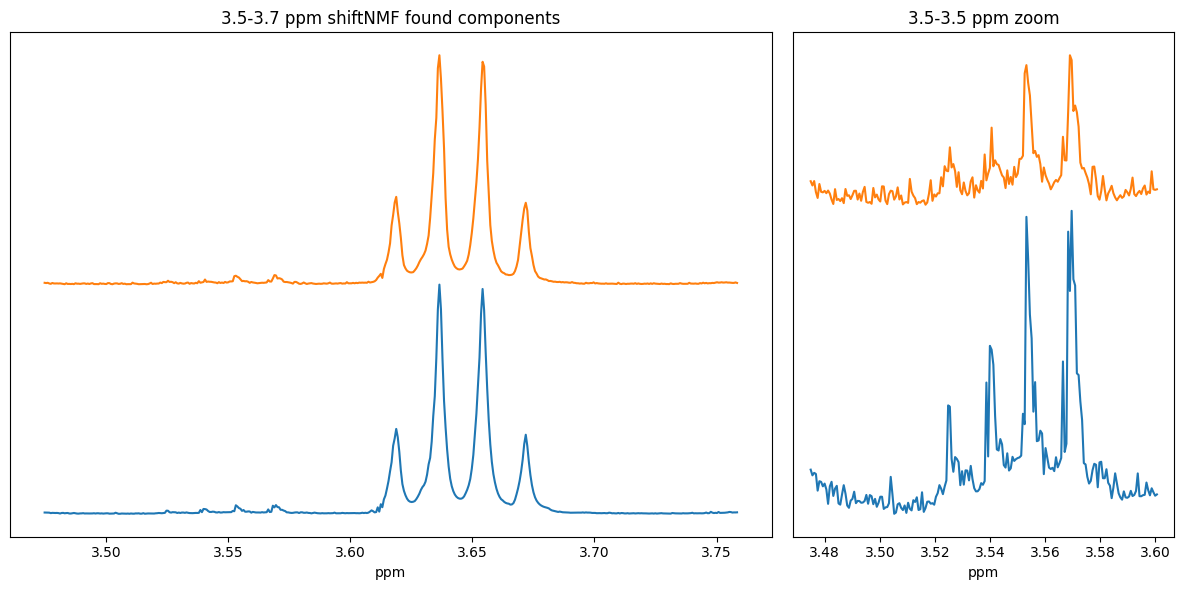

In [40]:
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])

fig = plt.figure(figsize=(12, 6))
H_scaled = np.zeros_like(H_est)
for i, vec in enumerate(H_est):
    H_scaled[i] = vec/max(vec)

# Plot H and H_est
ax1 = plt.subplot(gs[0])
plotSpaced(ax1, ppm, H_scaled.T)
ax1.set_title('3.5-3.7 ppm shiftNMF found components')
ax1.set_xlabel("ppm")

ax2 = plt.subplot(gs[1])
ax2.set_title('3.5-3.5 ppm zoom')
plotSpaced(ax2, ppm[250:],H_est[:,250:].T)
ax2.set_xlabel("ppm")


# change_violin_colors(violin_parts, [l.get_color() for l in ax3.get_children()[:3]])

# Set tight layout
plt.tight_layout()
plt.show()


# Hardmodel

Found peaks:[137 165 193 221 299 325 346 370]
sigma: 2.848935394552848 n:0.9304517431467306
sigma: 3.1890741702220535 n:4.499594928477514e-06
sigma: 2.9456389819890827 n:0.18217330727653006
sigma: 3.1827916217391454 n:0.939229454182335
sigma: 3.128767006480631 n:0.9998553077536322
sigma: 2.1084382522727116 n:0.9999971757459157
sigma: 2.2523591556409697 n:0.9999370753175233
sigma: 1.6261742826174856 n:0.9999980818199806
Lorentzian %:s: 0.046208905792170005
tensor([9.3717e-01, 3.3564e-06, 2.4589e-01, 9.6649e-01, 9.9994e-01, 1.0000e+00,
        9.9995e-01, 1.0000e+00], grad_fn=<SigmoidBackward0>)
Sigma:
Parameter containing:
tensor([2.9839, 3.2770, 2.9831, 3.3240, 4.7205, 3.3027, 3.8096, 3.2909],
       requires_grad=True)
HERER ARE THE SINGLE FITS SIGMAS
[2.983938  3.2769601 2.9830606 3.3239517 4.720487  3.302691  3.8096027
 3.290867 ]
hypothesises:
{(0, 1, 4, 5), (0, 1, 3, 7), (1, 2, 3, 4, 5, 6, 7), (1, 5, 7), (0, 1, 3, 5, 7), (0, 1, 6), (1, 4, 6, 7), (1, 2, 3, 7), (0, 5), (0, 3, 5, 7),

c:\Bachelorprojekt\nlars.py:64: LinAlgWarning: Ill-conditioned matrix (rcond=4.02363e-09): result may not be accurate.
  w = solve(XtX[np.ix_(A, A)], s)


tensor(222.)
torch.Size([1, 450])
tensor(223.)
torch.Size([1, 450])
tensor(265.5714)
torch.Size([1, 450])
tensor(278.)
torch.Size([1, 450])
tensor(238.4000)
torch.Size([1, 450])
tensor(209.)
torch.Size([1, 450])
tensor(286.2500)
torch.Size([1, 450])
tensor(237.)
torch.Size([1, 450])
tensor(218.5000)
torch.Size([1, 450])
tensor(256.7500)
torch.Size([1, 450])
tensor(242.2500)
torch.Size([1, 450])
tensor(326.6667)
torch.Size([1, 450])
tensor(216.2000)
torch.Size([1, 450])
tensor(235.2500)
torch.Size([1, 450])
tensor(283.)
torch.Size([1, 450])
tensor(259.6667)
torch.Size([1, 450])
tensor(205.3333)
torch.Size([1, 450])
tensor(262.6000)
torch.Size([1, 450])
tensor(256.7500)
torch.Size([1, 450])
tensor(239.2500)
torch.Size([1, 450])
tensor(231.7500)
torch.Size([1, 450])
tensor(230.)
torch.Size([1, 450])
tensor(273.)
torch.Size([1, 450])
tensor(241.6667)
torch.Size([1, 450])
tensor(219.3333)
torch.Size([1, 450])
tensor(265.)
torch.Size([1, 450])
tensor(242.6000)
torch.Size([1, 450])
tensor(253

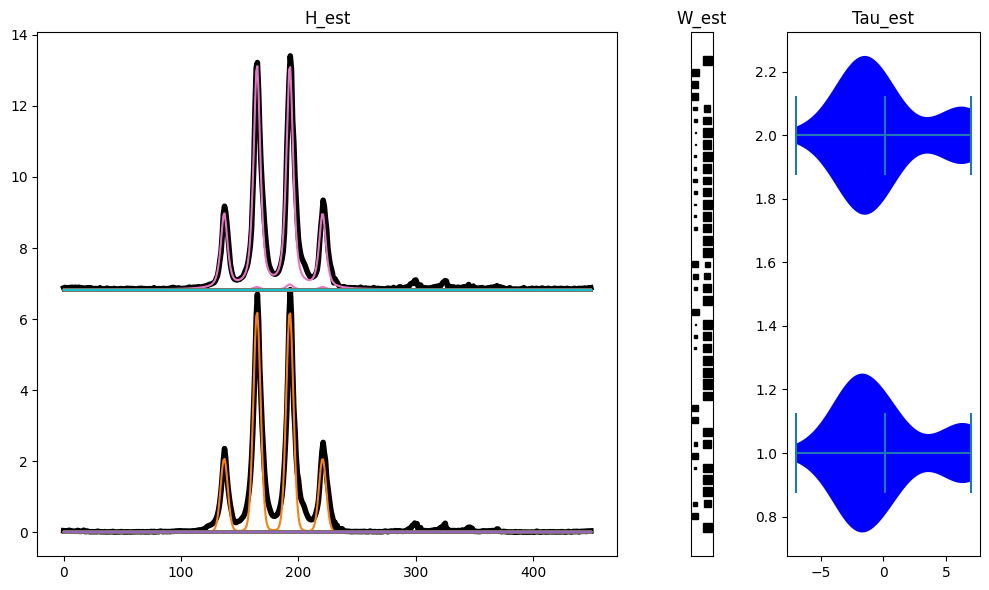

In [46]:

fig = plt.figure(figsize=(10, 6))
# Create a gridspec object with 2 rows and 3 columns
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 1, 1])

# Plot H and H_est
ax1 = plt.subplot(gs[0])
# plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
ax1.set_title('H_est')
x = np.arange(H_est.shape[1])

ax2 = plt.subplot(gs[1])
ax2.set_title('W_est')
hinton(W_est.T, ax=ax2)

ax3 = plt.subplot(gs[2])
violin_parts = ax3.violinplot(tau_est, showmeans=True, showmedians=False, vert=False)
ax3.set_title('Tau_est')
change_violin_colors(violin_parts, color_list=['blue']*3)
# change_violin_colors(violin_parts, [l.get_color() for l in ax3.get_children()[:3]])

# plt.figure(figsize=(15,5))
# plt.plot(H_est.T)
# plt.savefig("shiftcomponents")
# plt.clf()
ymax = 0
for i in range(len(H_est)):
    ymax = max(ymax,(H_est[i]/np.std(H_est[i])).max())
yoffset = ymax
reg_paths = []
lambda_axis = []
C_path = []

for i in range(len(H_est)):
    means, sigmas, n = single_fit(H_est[i], min_height=0.01, min_sigma=1, lr=0.1 , plot=False)
    #diff_matrix = calc_difference_matrix(sigmas)
    print("HERER ARE THE SINGLE FITS SIGMAS")
    print(sigmas)
    diff_matrix = calc_difference_matrix(np.ones((len(sigmas))))
    hypothesis = peak_hypothesis(diff_matrix)
    hardmodel = Hard_Model(H_est[i], hypothesis, means, sigmas, n, lr=10, alpha = 1e-3, factor=1, patience=1, min_imp=0.01)

    W, C, running_loss, path, lambdas = hardmodel.fit(verbose=True, return_loss=True, threshold=0.5)
    reg_paths.append(path)
    lambda_axis.append(lambdas)
    C_path.append(C)
    means, sigma, j_coup, mult, n = hardmodel.return_values()
    print("means:")
    print(means)
    print("sigmas:")
    print(sigma)
    print("J coupling:")
    print(j_coup)
    print("multiplicity")
    print(mult)
    print("N")
    print(n)

    print("W:")
    print(W)
    ## TODO change this to be the true underlying components from H_ART not the shift found components, they need to be scaled accordingly.
    # plt.figure(figsize=(15,5))
    # plt.plot(H_est[i]/np.std(H_est[i]), linewidth=5, color="k")
    ax1.plot(x,H_est[i]/np.std(H_est[i])+yoffset*i, linewidth=4, color="k")
    for j, vec in enumerate(C):
        ax1.plot(x,vec*W[:,j]+yoffset*i)
# Set tight layout
plt.tight_layout()
plt.show()

[ 6.57612616e+01  1.56821139e+00  9.66369818e-01  6.44407513e-01
  6.00984928e-01  4.94789008e-01  4.54435423e-01  4.20875391e-01
  3.27849085e-01  3.18333416e-01  3.02443299e-01  2.96499709e-01
  2.82011464e-01  2.52164372e-01  2.21761173e-01  2.06459094e-01
  1.89559683e-01  1.34535140e-01  1.32749999e-01  1.25566452e-01
  1.04999701e-01  9.52176605e-02  5.62352057e-02  5.45960178e-02
  2.94729013e-02  2.93552465e-02  2.07920918e-02  1.61226444e-02
  1.46024115e-02  9.88173003e-03  8.51106083e-03  8.47083249e-03
  7.81309033e-03  7.76838870e-03  7.73626608e-03  7.68318691e-03
  4.65790268e-03  4.47606822e-03  4.26079312e-03  2.79771231e-03
  2.67580223e-03  1.95898720e-03  1.00070895e-03  4.03134743e-04
  3.49971162e-04  2.71091562e-04  9.22436303e-05 -6.11702651e-05]
0.0


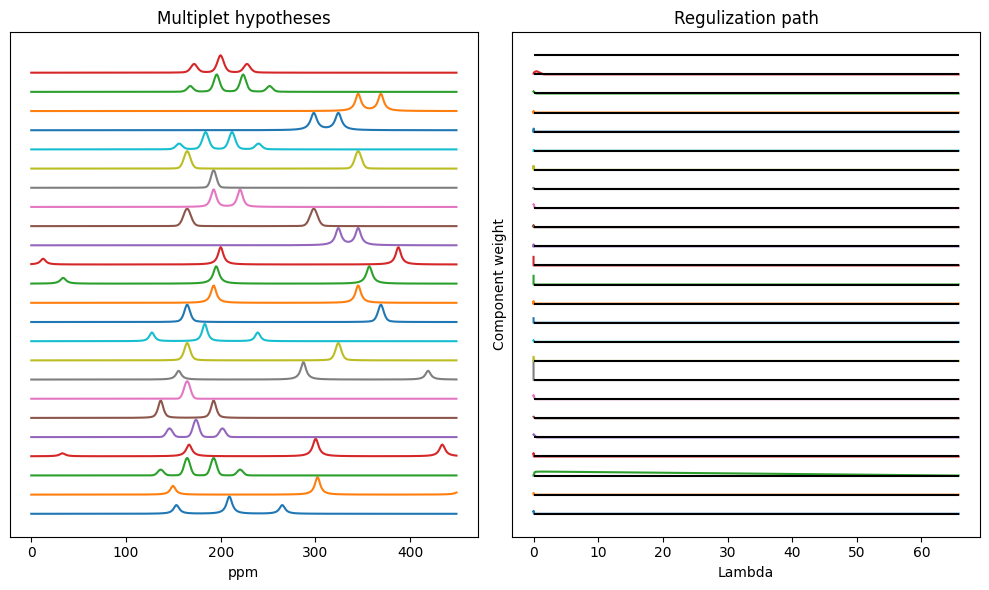

[ 5.58461215e+01  5.14717635e+01  2.78980404e+01  1.44951908e+00
  8.58769663e-01  7.64048501e-01  5.83647386e-01  5.69309234e-01
  3.61694706e-01  2.20002124e-01  1.37752795e-01  8.93573441e-02
  5.84234179e-02  5.72963093e-02  4.39763802e-02  2.98722653e-02
  2.84801593e-02  1.85014536e-02  1.38343516e-02  1.08407397e-02
  6.14936367e-03  5.38555742e-03  5.08929267e-03  2.92145499e-03
  2.14699161e-03  1.87388941e-03  9.27647257e-04  3.21457566e-04
 -3.36396196e-05]
0.0


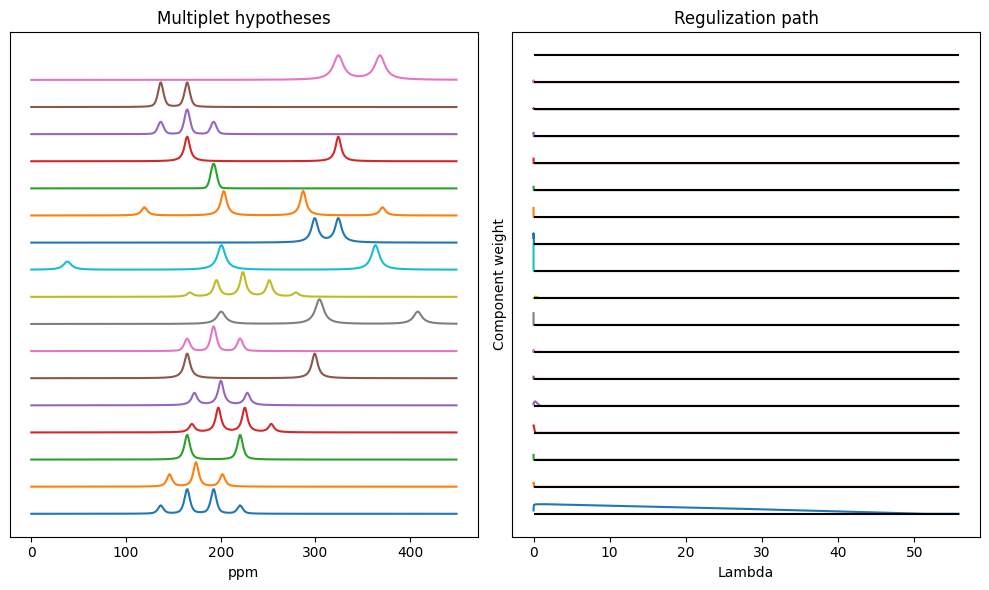

In [48]:
for i in range(len(reg_paths)):
    path = reg_paths[i]
    lambdas = lambda_axis[i]
    print(lambdas[0])
    C = C_path[i]


    fig = plt.figure(figsize=(10, 6))
    # Create a gridspec object with 2 rows and 3 columns
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

    # Plot H and H_est
    ax1 = plt.subplot(gs[0])
    # plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
    ax1.set_title('Multiplet hypotheses')

    ax1.set_xlabel("ppm")
   
    x = np.arange(H_est.shape[1])

    ax2 = plt.subplot(gs[1])
    ax2.set_title('Regulization path')
    ax2.set_xlabel("Lambda")
    ax2.set_ylabel("Component weight")

    ax1.tick_params(left = False, labelleft = False)
    ax2.tick_params(left = False, labelleft = False)

    ymax = 1.1
    # for j, vec in enumerate(C):
    #     ymax = max(ymax,(C[j]/max(C[j])).max())

    cutoff = [1]*3

    yoffset = ymax
    t = 0
    for j, vec in enumerate(C):
        if any(path[0][j] >= cutoff[i]):
            ax1.plot(x,vec/max(vec)+yoffset*t)
            t += 1
    print(path[0].min())
    
    ymax = path[0].max()
    yoffset = ymax
    t = 0
    for j, vec in enumerate(C):
        if any(path[0][j] >= cutoff[i]):
            ax2.plot(lambdas[0],path[0][j]+yoffset*t, scalex='log')
            ax2.hlines(yoffset*t,lambdas[0][-1],lambdas[0][0], color="k")
            t +=1
    ax2.hlines(yoffset*t,lambdas[0][-1],lambdas[0][0], color="k")

    #plt.title("Hardmodelled component regulization path")
    #plt.plot(lambdas[0], reg_paths[i][0].T)
    # plt.savefig("fig"+str(i)+"_path")
    plt.tight_layout()
    plt.show()